# Принятие решений в бизнесе

**Необходимо увеличить выручку крупного интернет-магазина, для этого нужно приоретизировать гипотезы, запустить A/B-тест и проанилизировать все результаты.**

**Часть 1. Приоритизация гипотез.**

**В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.**

**Задачи:**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**Часть 2. Анализ A/B-теста.**

**Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.**

**Задачи по анализу A/B-теста:**
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

## Часть 1. Приоритизация гипотез.

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Предобработка данных.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# Задаём максимальную видимость содержимого колонок - 150 символов
pd.set_option('display.max_colwidth', 150)

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Без дополнительных инструментов, по датасету и его информации видно, что дубликаты и пропуски отсутствуют.**

**Меняем шрифт названий колонок на змеиный:**

In [4]:
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')

**Вывод по предобработке данных:**
- Дубликаты и пропуски отсутствуют;
- Шрифт названий колонок изменен на змеиный.

**Структура полученных данных:**

- **hypothesis** - название гипотезы, object;
- **reach** - скольких пользователей затронет изменение по гипотезе, int64;
- **impact** - насколько сильно изменение повлияет на пользователей (их опыт и удовлетворение), int64;
- **confidence** - насколько мы уверены, что это изменение повлияет на пользователей именно так, int64;
- **efforts** - стоимость теста гипотезы, int64.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
# Создаём новый столбец с фреймворком ICE для приоритизации гипотез
hypothesis['ice_score'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

# Выводим датафрейм с сортировкой ICE по убыванию
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**По методу ICE приоритетнее в первую очередь тестировать гипотезу:**
- **Запустить акцию, дающую скидку на товар в день рождения**

**Также перспективны гипотезы:**
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
# Создаём новый столбец с фреймворком RICE для приоритизации гипотез
hypothesis['rice_score'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']
                            / hypothesis['efforts'])

# Выводим датафрейм с сортировкой RICE по убыванию
hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**По методу RICE вывод другой, приоритетнее в первую очередь тестировать гипотезу:**
- **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

**Также перспективны гипотезы:**
- **Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**
- **Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**
- **Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Приоритет гипотез по методу ICE:**
- **1) Запустить акцию, дающую скидку на товар в день рождения**


- **2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**


- **3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

**Приоритет гипотез по методу RICE:**
- **1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**


- **2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**


- **3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (одинаковый приоритет)**

**Изменение приоритета связано с компонентом Reach (какой будет охват при изменениях), который учитывается в методе RICE.**

## Часть 2. Анализ A/B-теста.

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### Предобработка данных.

**Так-как аномалии будут учитываться далее в анализе, не будем с ними работать с предобработке.**

**Смотрим на общую структуру данных:**

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Меняем названия столбцов в orders на змеиный шрифт:**

In [10]:
def snake_type(data):
    '''
    Функция принимает датафрейм.
    Возвращает список с измененными
    названиями столбцов под змеиный шрифт.
    '''
    columns = []
    for i in data.columns:
        column_name = []
        for j in i:
            if j == ' ':
                column_name.append('_')
            elif j.isupper():
                column_name.append(f'_{str.lower(j)}')
            else:
                column_name.append(j)
        columns.append(''.join(column_name))
    return columns


orders.columns = snake_type(orders)

**Проверяем наличие пропусков и дубликатов:**

In [11]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

**Пропусков и дубликатов нет. Меняем тип столбцов с датой с object на datetime:**

In [15]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод по предобработке данных:**
- Дубликаты и пропуски отсутствуют;
- Названия столбцов в orders изменён на змеиный шрифт;
- Тип данных столбцов date в orders и visitors изменён с object на datetime.


**Структура полученных данных:**

- **orders, заказы пользователей:**
    - **transaction_id** - ID заказа, int64
    - **visitor_id** - ID посетителя, int64
    - **date** - дата заказа, datetime
    - **revenue** - выручка, int64
    - **group** - группа теста, object


- **visitors, посещения:**
    - **date** - дата посещения, datetime
    - **group** - группа теста, object
    - **visitors** - количество посещений, int64

### Кумулятивные метрики.

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

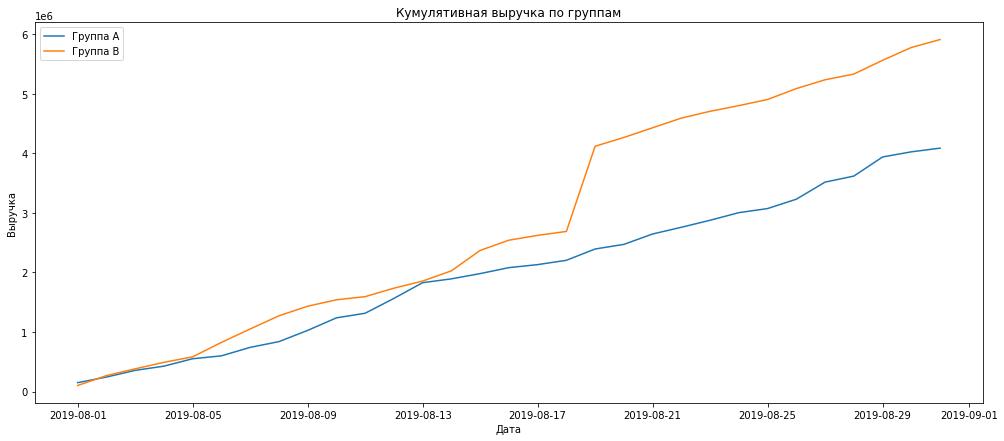

In [16]:
# Удаляем дубликаты
dates_groups = orders[['date','group']].drop_duplicates()

# Аггрегация заказов
orders_aggregated = (dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                            .agg({'date' : 'max',
                                  'group' : 'max',
                                  'transaction_id' : 'nunique',
                                  'visitor_id' : 'nunique',
                                  'revenue' : 'sum'}), axis=1)
                     .sort_values(by=['date','group']))

# Аггрегация посещений
visitors_aggregated = (dates_groups
                       .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                              .agg({'date' : 'max',
                                    'group' : 'max',
                                    'visitors' : 'sum'}), axis=1)
                       .sort_values(by=['date','group']))


# Кумулятивные данные заказов и посещений
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Данные о датах, выручке и числе заказов по группам
cumulative_revenue_a = cumulative_data.loc[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data.loc[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# График кумулятивной выручки по группам
plt.figure(figsize=(17, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='Группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='Группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

**По группе B обнаружен резкий скачек выручки - что указывает аномалию.**

**Предположительно, это связано с сезоном отпусков в ближе к концу августа. Но пока-что точно мы сказать не можем.**

**По двум группам видна стабильная выручка без длительных остановок, и группа B превосходит группу A по выручке.**

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

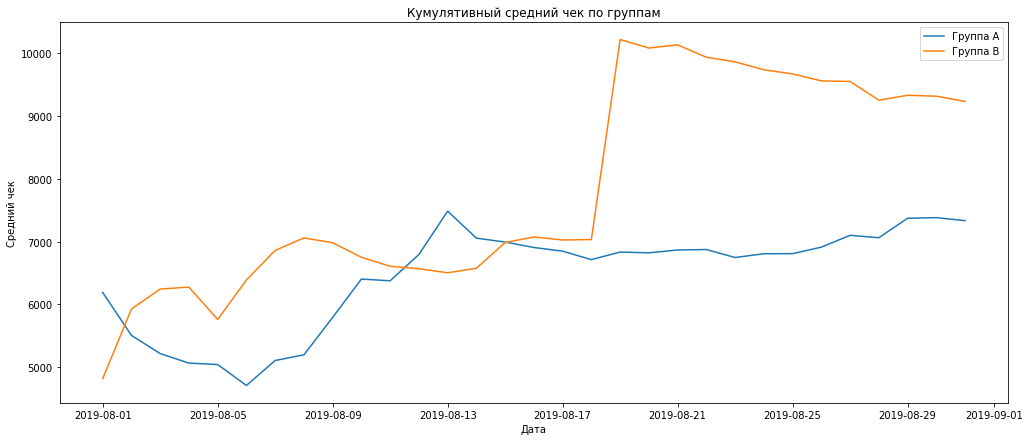

In [17]:
plt.figure(figsize=(17, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='Группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='Группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

**Средний чек по группе B выше группы A.**

**По среднему чеку у группы B также заметна аномалия в виде резкого всплеска. Также это предположительно указывает на сезон отпусков.**

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

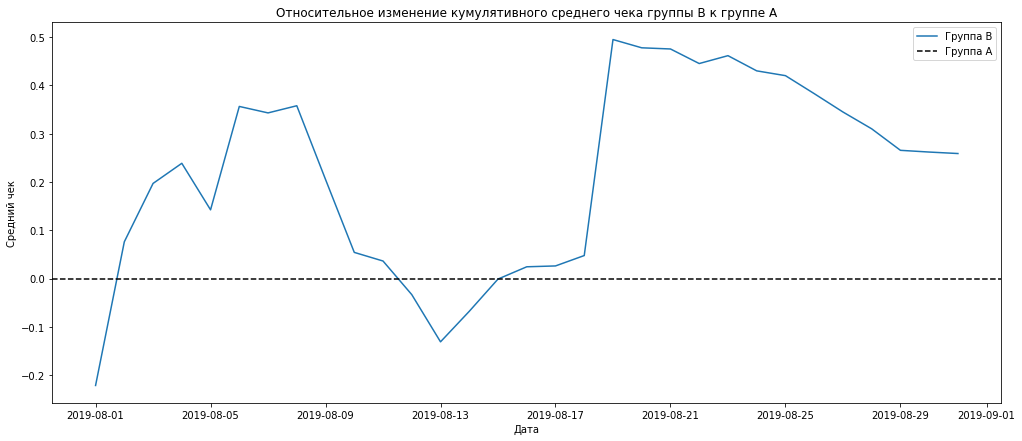

In [18]:
# Cобираем данные в одном датафрейме
merged_cumulative_revenue = (cumulative_revenue_a
                           .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(merged_cumulative_revenue['date'],
         ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
          /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1),
         label='Группа B'
        )
plt.axhline(y=0, color='black', linestyle='--', label='Группа A')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

**Видно то-же самое, что средний чек группы B в начале был меньше группы A, затем вырос и снова стал ниже. Аномалия сильно влияет на выводы, то что средний чек группы B сильно выбивается ближе к концу теста.**

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

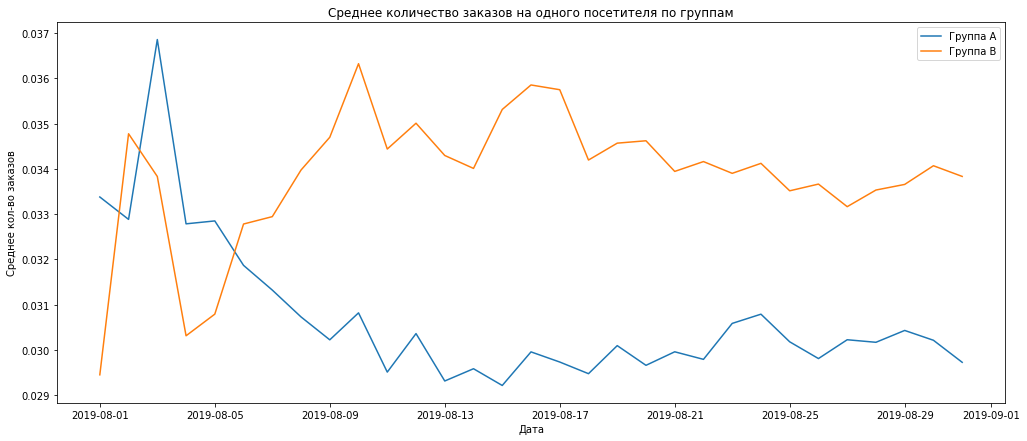

In [19]:
# Считаем среднее количество заказов на посетителя (конверсию)
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Отделяем данные по группам
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа B')
plt.title('Среднее количество заказов на одного посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.legend()
plt.show()

**В начале теста, до 5 августа 2019 года включительно по среднему количеству заказов преобладала группа A. Потом по каким-то обстоятельствам количество заказов в среднем стало больше у посетителей группы B. Точные причины нам не ясны.**

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

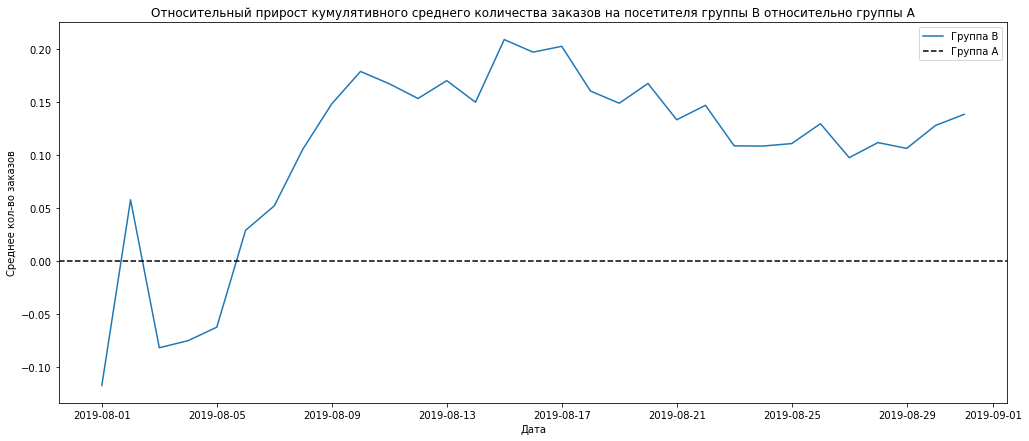

In [20]:
# Объединям данные
merged_cumulative_conversions = (cumulative_data_a[['date','conversion']]
                                 .merge(
                                     cumulative_data_b[['date','conversion']],
                                     left_on='date',
                                     right_on='date',
                                     how='left', 
                                     suffixes=['A', 'B']
                                 ))

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1,
    label='Группа B'
)
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.axhline(y=0, color='black', linestyle='--', label='Группа A')
plt.legend()
plt.show()

**Вывод можно сделать такой-же, как в прошлом пункте - в начале преобладало среднее количество заказов группы A, а теперь группы B.**

### Анализ выбросов и всплесков.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

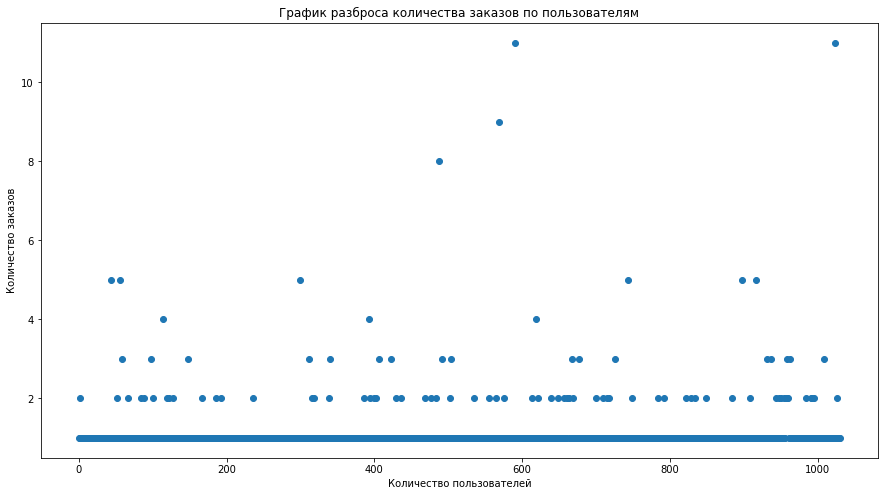

In [21]:
# Группируем данные по ID посетителя
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']

# Полный точечный график
plt.figure(figsize=(15, 8))
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('График разброса количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

**Заказов более 5 на одного посетителя - уже большая редкость.**

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных посетителей.

In [22]:
# Для визуальной разницы возьмём ещё 90-й и 99.5-й процентиль
print('90, 95, 99 и 99.5 процентили:', np.percentile(orders_by_users['orders'], [90, 95, 99, 99.5]))

90, 95, 99 и 99.5 процентили: [1. 2. 4. 5.]


**Не более 0.5% пользователей имеют заказов больше 5-и. Подтверждаем это значение как граница для аномальных пользователей.**

**Выбираем 99.5-й процентиль, чтобы меньше терять данных.**

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

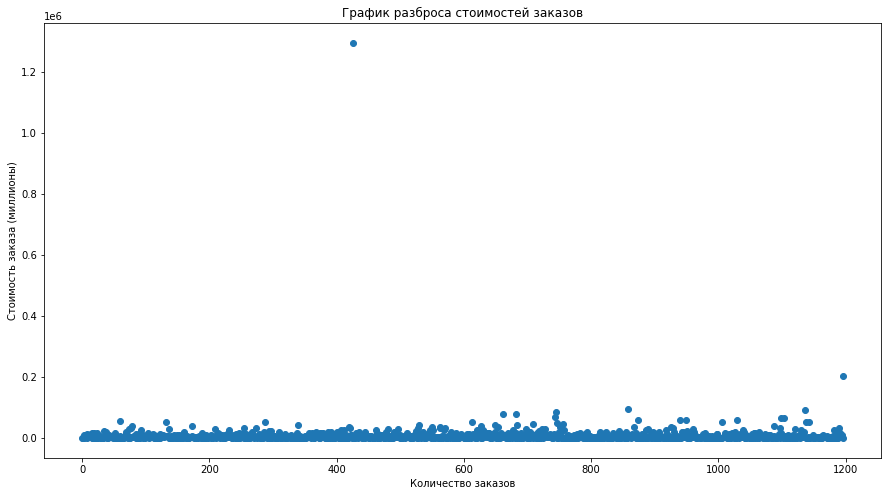

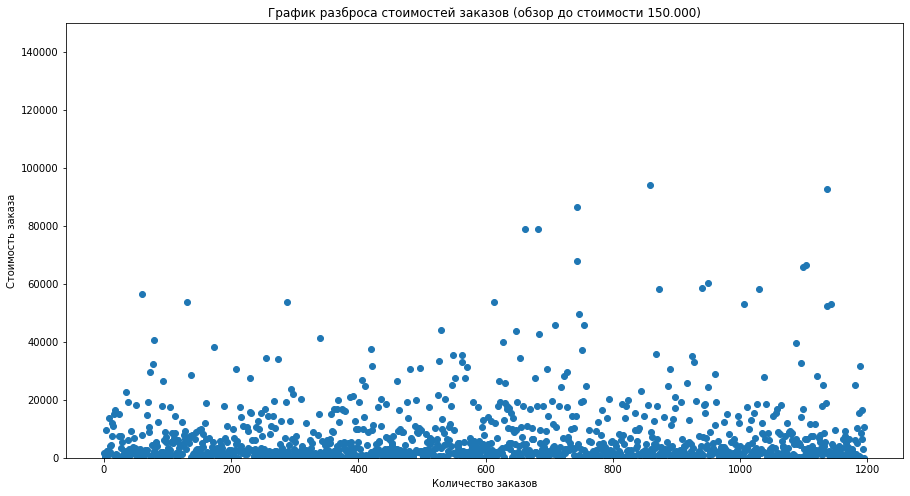

In [23]:
# Полный точечный график
plt.figure(figsize=(15, 8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График разброса стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа (миллионы)')
plt.show()

# Точечный график с узким диапазоном стоимости заказов 150.000
plt.figure(figsize=(15, 8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim((0, 150000))
plt.title('График разброса стоимостей заказов (обзор до стоимости 150.000)')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказа')
plt.show()

**Все заказы стоимости свыше 100.000 можно предполагать как аномальные выбросы.**

**Можно предположить, что заказ на сумму свыше 1.2 миллионов повлиял на аномальный всплеск группы B по выручке и среднему чеку.**

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [24]:
# Для визуальной разницы возьмём ещё 90-й и 99.5-й процентиль
print('90, 95, 99 и 99.5 процентили:', np.percentile(orders['revenue'], [90, 95, 99, 99.5]))

90, 95, 99 и 99.5 процентили: [18168.  28000.  58233.2 78990. ]


**Не более 0.5% заказов имеют стоимость дороже 78990. Возьмём эту стоимость как границу аномальных заказов.**

**Также мы выбрали 99.5-й процентиль для меньшей потери данных.**

### Анализ тестов с сырыми и очищенными данными.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Рассчитаем P-value и относительный прирост среднего кол-ва заказов группы B к группе A. Будем использовать двустороннюю проверку и сформулируем гипотезы так:**

- **Нулевая гипотеза: Среднее кол-во заказов группы B = Среднее кол-во заказов группы A**
- **Альтернативная гипотеза: Среднее кол-во заказов группы B ≠ Среднее кол-во заказов группы A**

**Для начала подготовим сгруппированные данные:**

In [25]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat([
    orders_by_users_a['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')
], axis=0)

sample_b = pd.concat([
    orders_by_users_b['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')
], axis=0)

**Применяем тест и проверяем относительный прирост группы B к группе A.**

**Применяем коррекцию для определения уровня значимости, так-как здесь множественная проверка гипотез на одних данных. Без коррекции может возникнуть проблема подглядывания.**

**Далее корректированный уровень значимости будет применяться в остальных тестах.**

In [26]:
alpha_corr = 1-((1-0.05)**(1/2))
p_value = stats.mannwhitneyu(sample_a, sample_b).pvalue.round(5)

print('Корректированный уровень значимости:', alpha_corr)
print('P-value:', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу.')
    print('Среднее кол-во заказов групп по "сырым" данным различны.')
else:
    print('Не отвергаем нулевую гипотезу.')
    print('Среднее кол-во заказов групп по "сырым" данным не различны.')

print('')

print('Относительный прирост группы B к группе A:', (sample_b.mean() / sample_a.mean() - 1).round(5))

Корректированный уровень значимости: 0.025320565519103666
P-value: 0.01679
Отвергаем нулевую гипотезу.
Среднее кол-во заказов групп по "сырым" данным различны.

Относительный прирост группы B к группе A: 0.13808


**Среднее кол-во заказов групп различны, соответственно, сами группы по среднему кол-ву заказов различны.**

**У группы B относительный прирост кол-ва заказов к группе A на 13,8%. Явно говорит о превосходстве группы B.**

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Также рассчитаем P-value и относительный прирост группы B к группе A. Возьмём для теста двустороннюю гипотезу:**

- **Нулевая гипотеза: Средний чек группы B = Средний чек группы A**
- **Альтернативная гипотеза: Средний чек группы B ≠ Средний чек группы A**

In [27]:
p_value = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
           .pvalue
           .round(5))

print('P-value:', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу.')
    print('Средний чек групп по "сырым" данным различен.')
else:
    print('Не отвергаем нулевую гипотезу.')
    print('Средний чек групп по "сырым" данным не различен.')

print('')

print('Относительный прирост группы B к группе A:',
    '{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.72929
Не отвергаем нулевую гипотезу.
Средний чек групп по "сырым" данным не различен.

Относительный прирост группы B к группе A: 0.25871


**По среднему чеку группы уже не различны. При этом, у группы B относительный прирост к группе A на 25,87%.**

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

**Выделим пользователей, которые совершили аномальные заказы.**

In [28]:
many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > 5]['visitor_id'],
     orders_by_users_b[orders_by_users_b['orders'] > 5]['visitor_id']],
    axis=0
)

expensive_orders = orders[orders['revenue'] > 78990]['visitor_id']

abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

**Рассчитываем P-value и относительный прирост группы B к группе A по среднему кол-ву заказов, по очищенным данным.**

**Формулировка гипотез:**

- **Нулевая гипотеза: Среднее кол-во заказов группы B = Среднее кол-во заказов группы A**
- **Альтернативная гипотеза: Среднее кол-во заказов группы B ≠ Среднее кол-во заказов группы A**

In [29]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered).pvalue.round(5)

print('P-value:', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу.')
    print('Среднее кол-во заказов групп по "очищенным" данным различны.')
else:
    print('Не отвергаем нулевую гипотезу.')
    print('Среднее кол-во заказов групп по "очищенным" данным не различны.')

print('')

print('Относительный прирост группы B к группе A:', (sample_b_filtered.mean() / sample_a_filtered.mean() - 1).round(5))

P-value: 0.01909
Отвергаем нулевую гипотезу.
Среднее кол-во заказов групп по "очищенным" данным различны.

Относительный прирост группы B к группе A: 0.142


**По очищенным данным, группы по среднему кол-ву заказов также различны. Здесь у группы B относительный прирост к группе A составляет 14,2%.**

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Формулировка гипотез:**

- **Нулевая гипотеза: Средний чек группы B = Средний чек группы A**
- **Альтернативная гипотеза: Средний чек группы B ≠ Средний чек группы A**

In [30]:
alpha = 0.05
p_value = (
    stats.mannwhitneyu(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )
        ]['revenue'],
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )
        ]['revenue']
    ).pvalue.round(5)
)

print('P-value:', p_value)

if p_value < alpha_corr:
    print('Отвергаем нулевую гипотезу.')
    print('Средний чек групп по "очищенным" данным различен.')
else:
    print('Не отвергаем нулевую гипотезу.')
    print('Средний чек групп по "очищенным" данным не различен.')

print('')

print('Относительный прирост группы B к группе A:',
    (
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users))
            )
        ]['revenue'].mean()
        - 1
    ).round(5)
)

P-value: 0.81615
Не отвергаем нулевую гипотезу.
Средний чек групп по "очищенным" данным не различен.

Относительный прирост группы B к группе A: -0.05318


**В очищенных данных также, как и в сырых, нету различий между группами по среднему чеку.**

**Есть отличие - теперь относительный прирост группы B к группе A отрицательный: -5,32%. Видимо, после удаления аномального заказа на сумму свыше 1,2 миллиона, средний чек по группе B упал. Проверим это:**

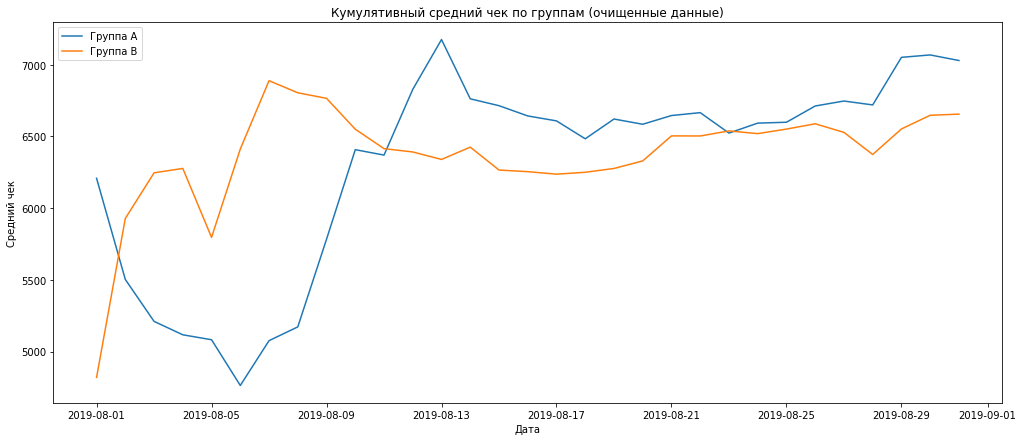

In [31]:
# Создаём копию датафрейма orders без аномалий
mask = orders.loc[orders['visitor_id'].isin(abnormal_users)]
clear_orders = orders.drop(index=mask.index)

# Удаляем дубликаты
dates_groups = clear_orders[['date','group']].drop_duplicates()

# Аггрегация заказов
orders_aggregated = (dates_groups
                     .apply(lambda x: clear_orders[np.logical_and(clear_orders['date'] <= x['date'], clear_orders['group'] == x['group'])]
                            .agg({'date' : 'max',
                                  'group' : 'max',
                                  'transaction_id' : 'nunique',
                                  'visitor_id' : 'nunique',
                                  'revenue' : 'sum'}), axis=1)
                     .sort_values(by=['date','group']))

# Аггрегация посещений
visitors_aggregated = (dates_groups
                       .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                              .agg({'date' : 'max',
                                    'group' : 'max',
                                    'visitors' : 'sum'}), axis=1)
                       .sort_values(by=['date','group']))


# Кумулятивные данные заказов и посещений
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Данные о датах, выручке и числе заказов по группам
cumulative_revenue_a = cumulative_data.loc[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data.loc[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='Группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='Группа B')
plt.title('Кумулятивный средний чек по группам (очищенные данные)')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 
plt.show()

**Как видно, удаление аномалий повлияло на показатели среднего чека по группам.**

**Теперь в самом начале теста - лидирует группа A, затем группа B, и до конца теста по среднему чеку лидирует группа A, в одну дату уступив группе B.**

**Также можем убедиться в этом, посмотрев на относительное изменение среднего чека группы B к группе A на графике:**

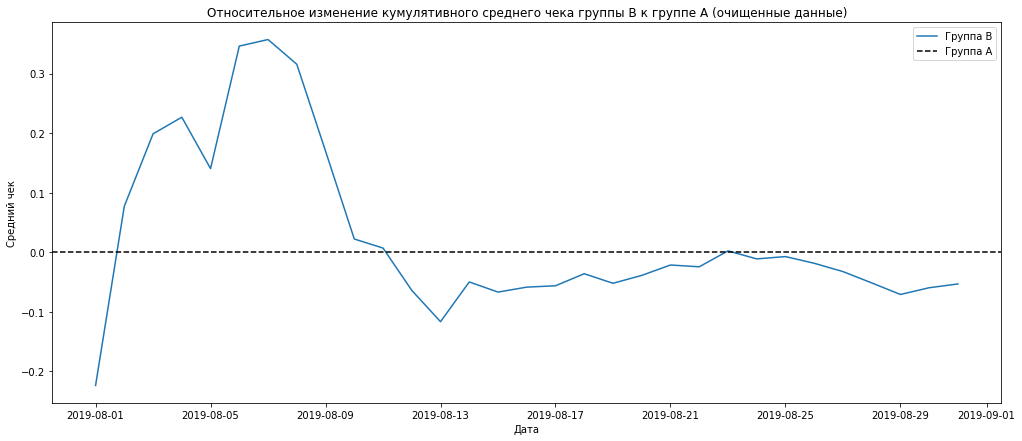

In [32]:
# Cобираем данные в одном датафрейме
merged_cumulative_revenue = (cumulative_revenue_a
                           .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(merged_cumulative_revenue['date'],
         ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
          /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1),
         label='Группа B'
        )
plt.axhline(y=0, color='black', linestyle='--', label='Группа A')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A (очищенные данные)')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

#### Примите решение по результатам теста и объясните его. Варианты решений:
- **1) Остановить тест, зафиксировать победу одной из групп.**
- **2) Остановить тест, зафиксировать отсутствие различий между группами.**
- **3) Продолжить тест.**

**Исходя из выявленных фактов:**
- **Группы по среднему кол-ву заказов различны, что по сырым и очищенным данным;**
- **Группы по среднему чеку не различны, по сырым и очищенным данным;**
- **У группы B отрицательный относительный прирост к группе A по среднему чеку, исходя из очищенных данных;**
- **У группы B положительный относительный прирост к группе A по среднему количеству заказов, т.е. конверсии.**

**Посмотрим на изменение среднего количества заказов по группам по очищенным данным на графиках:**

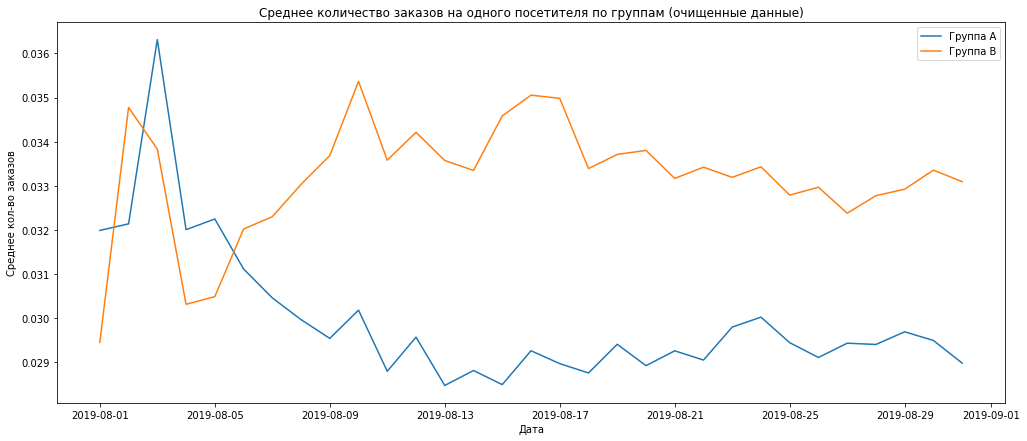

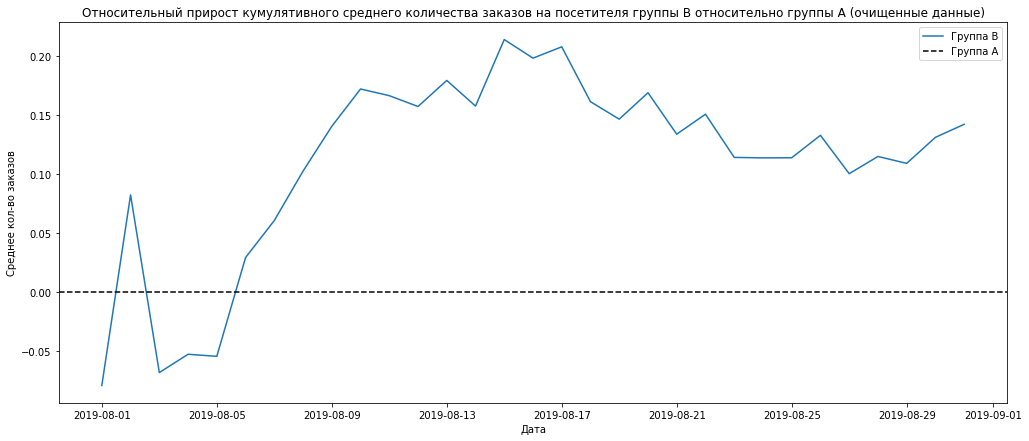

In [33]:
# Считаем среднее количество заказов на посетителя (конверсию)
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Отделяем данные по группам
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа B')
plt.title('Среднее количество заказов на одного посетителя по группам (очищенные данные)')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.legend()
plt.show()

# Объединям данные
merged_cumulative_conversions = (cumulative_data_a[['date','conversion']]
                                 .merge(
                                     cumulative_data_b[['date','conversion']],
                                     left_on='date',
                                     right_on='date',
                                     how='left', 
                                     suffixes=['A', 'B']
                                 ))

# Строим график
plt.figure(figsize=(17, 7))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1,
    label='Группа B'
)
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A (очищенные данные)')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.axhline(y=0, color='black', linestyle='--', label='Группа A')
plt.legend()
plt.show()

**Группа B явно лидирует по среднему количеству заказов (т.е. конверсии заказов), а также есть различие в группах по тесту. По среднему чеку у групп нет различий, исходя из теста.**

**Продолжать тест чтобы выявить различие по среднему чеку не обосновано.**

**Заключение: Остановить тест и зафиксировать победу группы B.**

## Вывод по проделанной работе.

### Часть 1. Приоритизация гипотез.

#### Предобработка данных.

- **Пропуски и дубликаты в данных гипотез для задания приоритета отсутствуют;**


- **Изменён шрифт названий столбцов на змеиный;**


- **Была расписана структура данных.**


#### Приоритезация гипотез.

**Были применены методы ICE и RICE для приоритезации гипотез:**

**Приоритет гипотез по методу ICE:**
- **1) Запустить акцию, дающую скидку на товар в день рождения**


- **2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей**


- **3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**

**Приоритет гипотез по методу RICE:**
- **1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**


- **2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**


- **3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (одинаковый приоритет)**

**Изменение приоритета связано с компонентом Reach (какой будет охват при изменениях), который учитывается в методе RICE.**




### Часть 2. Анализ A/B-теста.

#### Предобработка данных.

- **Дубликаты и пропуски отсутствуют;**


- **Названия столбцов в orders изменён на змеиный шрифт;**


- **Тип данных столбцов date в orders и visitors изменён с object на datetime;**


- **Была расписана структура данных.**

#### Кумулятивные метрики.

- **По графику кумулятивной выручки по двум группам видна стабильная выручка без длительных остановок, и группа B превосходит группу A по выручке. Также виден аномальынй всплеск группы B по выручке.**


- **По графику изменения кумулятивного среднего чека и относительного изменения ср. чека группы B к группе A лидирует группа B, но также заметен её аномальный всплеск.**


- **По графику изменения кумулятивного среднего кол-ва заказов и относительного изменения ср. кол-ва заказов группы B к группе A лидирует группа B. Аномальных всплесков для лидерства группы B по сырым данным не наблюдается.**

#### Анализ выбросов и всплесков.

- **На основе графика разброса и 99.5 процентиля количества заказов, принято решение считать кол-во заказов больше 5-и на одного пользователя аномальными.**


- **По таким же инструментам, принято считать сумму заказа свыше 78990 - аномальной.**

**Далее в анализе тестов аномальные значения в "очищенных" данных исключены.**

#### Анализ тестов с сырыми и очищенными данными.

**Были проведены двусторонние тесты гипотез о различиях средних значений по группам. Также применена коррекция к уровню значимости для избежания проблемы подглядывания, так-как проводится множественный тест на одном наборе данных.**

**Формулировка гипотез для среднего количества заказов по группам, для сырых и очищенных данных:**

- **Нулевая гипотеза: Среднее кол-во заказов группы B = Среднее кол-во заказов группы A**
- **Альтернативная гипотеза: Среднее кол-во заказов группы B ≠ Среднее кол-во заказов группы A**

**Формулировка для среднего чека по группам, также для сырых и очищенных данных:**

- **Нулевая гипотеза: Средний чек группы B = Средний чек группы A**
- **Альтернативная гипотеза: Средний чек группы B ≠ Средний чек группы A**

**В результате тестов на сырых и очищенных данных было выявлено:**

- **Группы по среднему кол-ву заказов различны, что по сырым и очищенным данным;**


- **Группы по среднему чеку не различны, по сырым и очищенным данным;**


- **У группы B отрицательный относительный прирост к группе A по среднему чеку, исходя из очищенных данных;**


- **У группы B положительный относительный прирост к группе A по среднему количеству заказов, т.е. конверсии.**

**Продолжать тест чтобы выявить различие по среднему чеку не обосновано.**

**Заключение тестов: Остановить тест и зафиксировать победу группы B.**




## Рекомендации заказчику.

### Часть 1. Приоритизация гипотез.

- **1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**


- **2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа**


- **3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (одинаковый приоритет)**

### Часть 2. Анализ A/B-теста.

**Остановить тест и зафиксировать победу группы B, так-как группа B лидирует по конверсии заказов. Различие между группами A и B по среднему чеку нет.**